## Perform Supervised Machine Learning, Logistic Regression Model on Heart Attack Data.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, accuracy_score

### Read in processed data csv file and perform data exploration.

In [2]:
# Read in csv data
file_path = Path('processed_data.csv')
df_heart_data = pd.read_csv(file_path)

# Drop the first column
df_heart_data_cleaned = df_heart_data.drop(df_heart_data.columns[0], axis=1)

# Display dropped data frame
df_heart_data_cleaned.head()


,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,Sex_Male,LastCheckupTime_Within past 2 years (1 year but less than 2 years ago),LastCheckupTime_Within past 5 years (2 years but less than 5 years ago),LastCheckupTime_Within past year (anytime less than 12 months ago),PhysicalActivities_Yes,...,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,AlcoholDrinkers_Yes
0,-0.48774,0.113974,-0.025174,-0.061718,1.404549,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,-0.48774,-0.508455,0.674879,1.619866,0.760563,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,-0.48774,-0.508455,-0.725227,-0.528825,0.116577,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.48774,-0.508455,0.674879,0.872496,-0.097769,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,-0.48774,-0.508455,-0.025174,0.685653,1.189729,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [3]:
# Explore data, check if there is any null data
print(df_heart_data_cleaned.isnull())

       PhysicalHealthDays  MentalHealthDays  SleepHours  HeightInMeters  \
0                   False             False       False           False   
1                   False             False       False           False   
2                   False             False       False           False   
3                   False             False       False           False   
4                   False             False       False           False   
...                   ...               ...         ...             ...   
24995               False             False       False           False   
24996               False             False       False           False   
24997               False             False       False           False   
24998               False             False       False           False   
24999               False             False       False           False   

       WeightInKilograms  Sex_Male  \
0                  False     False   
1                  Fals

array([[<Axes: title={'center': 'PhysicalHealthDays'}>,
        <Axes: title={'center': 'MentalHealthDays'}>],
       [<Axes: title={'center': 'SleepHours'}>,
        <Axes: title={'center': 'HeightInMeters'}>],
       [<Axes: title={'center': 'WeightInKilograms'}>, <Axes: >]],
      dtype=object)

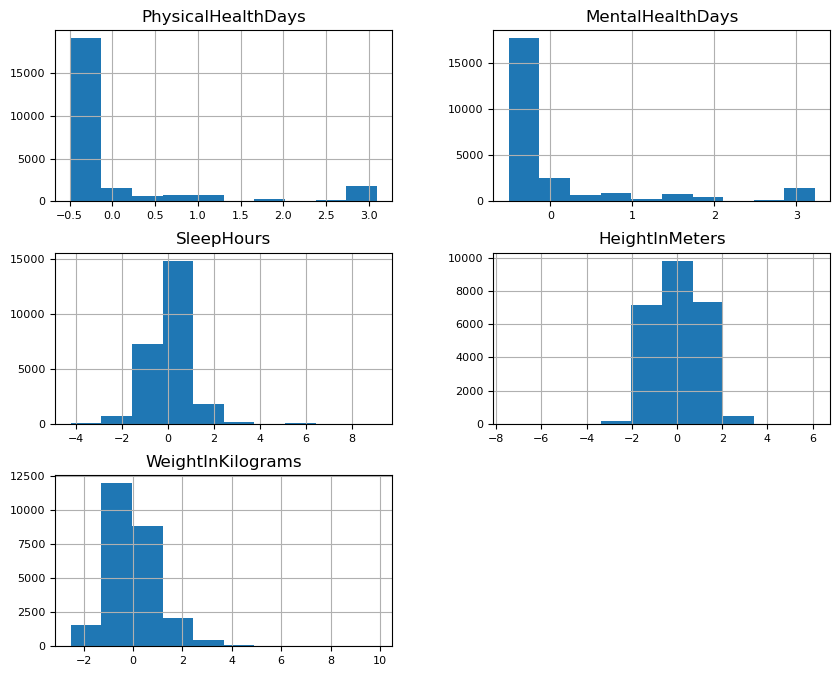

In [4]:
# Data exploration, histogram on numerical, the first 5 columns
df_heart_data_cleaned.hist(column=['PhysicalHealthDays','MentalHealthDays','SleepHours','HeightInMeters','WeightInKilograms'], xlabelsize=8, ylabelsize=8, figsize=(10,8))

<Figure size 640x480 with 0 Axes>

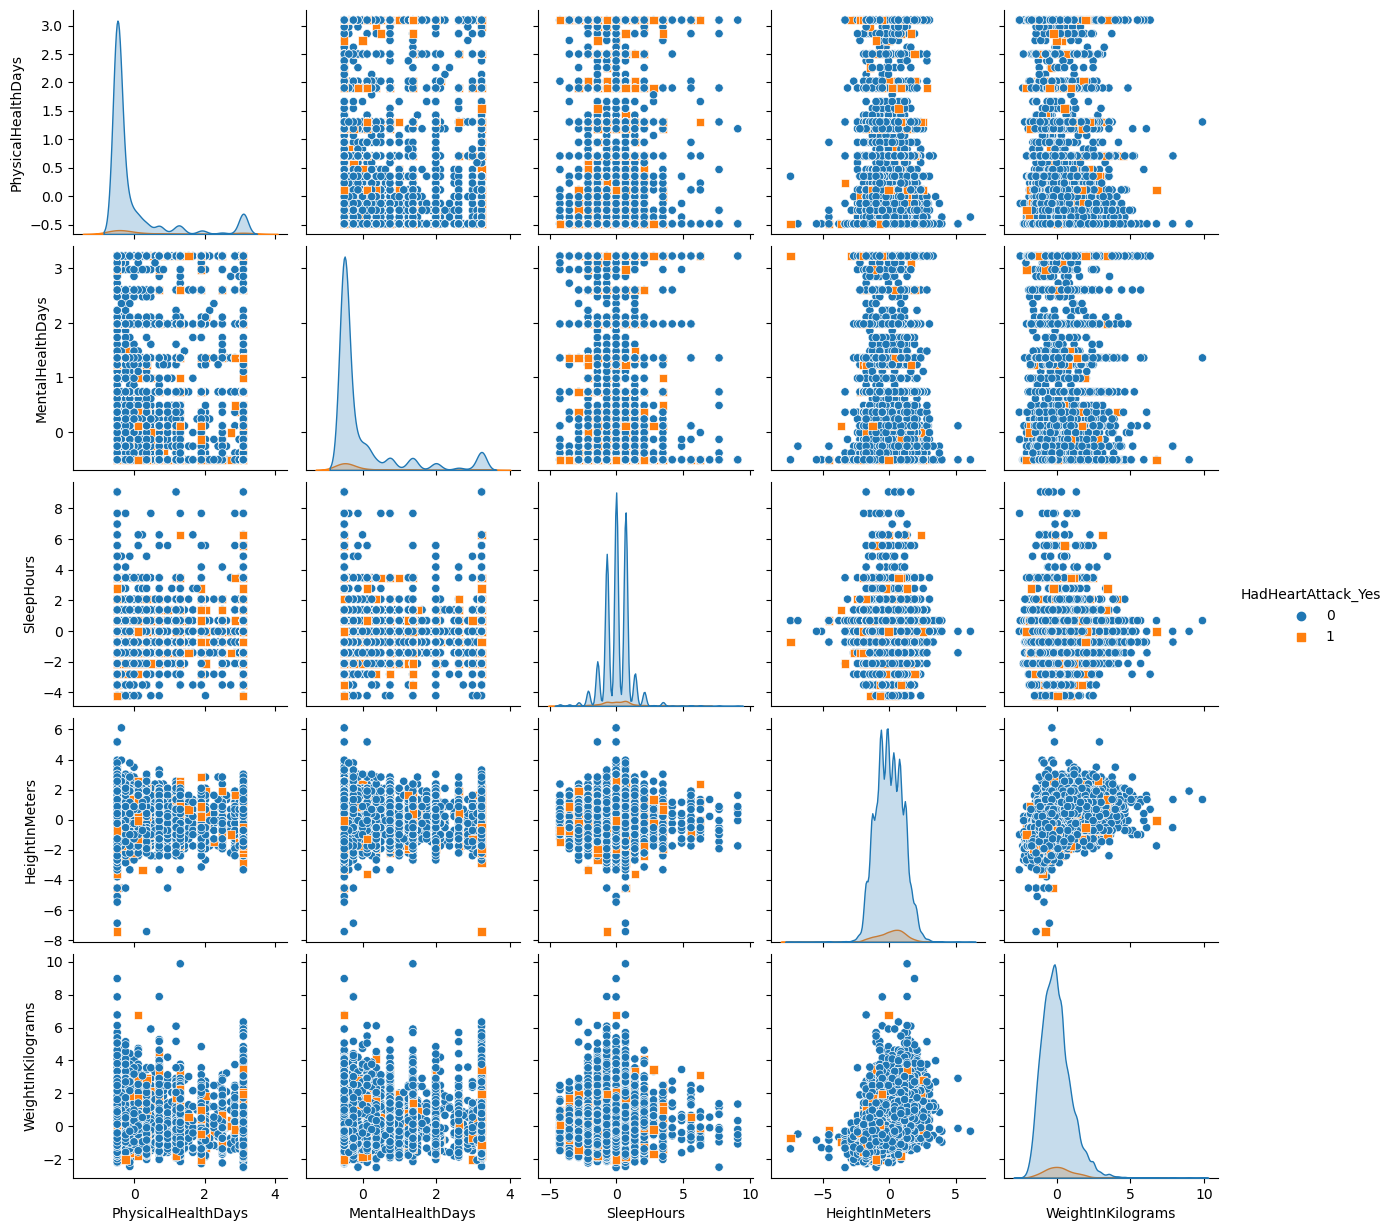

In [5]:
# Data exploration, check any correlations
## import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# plot correlation charts using the first 5 numerical columns and HadHeartAttack_Yes column
plt.figure()
# cols_to_plot = df_heart_data_cleaned.columns[1:5].tolist() 
# cols_to_plot
sns.pairplot(df_heart_data_cleaned[['PhysicalHealthDays','MentalHealthDays','SleepHours','HeightInMeters','WeightInKilograms', 'HadHeartAttack_Yes']], hue='HadHeartAttack_Yes', markers = ['o','s'])
plt.show()


### Create the labels set ('y') from HadHeartAttack_Yes from df_heart_data_cleaned and then create the features ('X') DataFrame from the remaining columns.
#### Note: The target y column > HadHeartAttack_Yes = 0 means no heart atackes, 1 means yes to heart attacks. 

In [6]:
# # Separate the data into labels and features

# Separate the y variable, the labels
y = df_heart_data_cleaned['HadHeartAttack_Yes']

# Separate the X variable, the features
X = df_heart_data_cleaned.drop('HadHeartAttack_Yes', axis=1)

In [7]:
# Review the y variable Series
y

0        0
1        0
2        0
3        0
4        0
        ..
24995    0
24996    0
24997    1
24998    0
24999    0
Name: HadHeartAttack_Yes, Length: 25000, dtype: int64

In [8]:
# Review the X DataFrame
X

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,Sex_Male,LastCheckupTime_Within past 2 years (1 year but less than 2 years ago),LastCheckupTime_Within past 5 years (2 years but less than 5 years ago),LastCheckupTime_Within past year (anytime less than 12 months ago),PhysicalActivities_Yes,...,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,AlcoholDrinkers_Yes
0,-0.487740,0.113974,-0.025174,-0.061718,1.404549,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,-0.487740,-0.508455,0.674879,1.619866,0.760563,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,-0.487740,-0.508455,-0.725227,-0.528825,0.116577,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.487740,-0.508455,0.674879,0.872496,-0.097769,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,-0.487740,-0.508455,-0.025174,0.685653,1.189729,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,-0.129371,-0.508455,-0.025174,0.405389,-0.312589,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
24996,0.706823,-0.508455,-0.025174,0.872496,0.975383,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
24997,0.109541,-0.508455,-0.025174,-0.061718,6.770308,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
24998,3.095947,-0.508455,0.674879,-1.463038,3.056862,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0


In [9]:
# Check the balance of our target value y.
y.value_counts()

0    23673
1     1327
Name: HadHeartAttack_Yes, dtype: int64

### Split data into training and testing datasets.

In [10]:
# Split the data into training and testing datasets by using train_test_split
# Import the train_test_learn modeul
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 42 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Use RandomOverSampler to resample imbalanced original data.

In [11]:
# Data is unbalanced, therefore use RandomOverSampler module from the imbalanced-learn library to resample the data. 
# Import the RandomOverSampler module from imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model, and assign a random_state parameter of 42 to the model
imb_model = RandomOverSampler(random_state=42)

# Fit the original training data to the random_oversampler model
lr_imb_model = imb_model.fit(X_train, y_train)


In [12]:
# Generate resamples X and y
X_res, y_res = imb_model.fit_resample(X,y)

In [13]:
# Count resamples y
y_res.value_counts()

0    23673
1    23673
Name: HadHeartAttack_Yes, dtype: int64

In [14]:
# Generate resampled X and y training data
X_train_res, y_train_res = imb_model.fit_resample(X_train, y_train)

In [15]:
# Count resampled y train data
y_train_res.value_counts()

0    17760
1    17760
Name: HadHeartAttack_Yes, dtype: int64

### Use the LogisticRegression classifier and the resampled data to fit the model and make predictions.

In [16]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(solver='lbfgs', max_iter=200, random_state=42)

# Fit the model using the resampled training data
resampled_model = model.fit(X_train_res, y_train_res)

# Make a prediction using the testing data
resampled_testing_predict = model.predict(X_test)

### Make Prediction and evaluate the model's performance based on resampled data

In [17]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, resampled_testing_predict)

0.7894274096054512

In [18]:
# Generate a confusion matrix for the model
resample_matrix = confusion_matrix(y_test,resampled_testing_predict)
resample_matrix

array([[5037,  876],
       [  92,  245]], dtype=int64)

In [19]:
# Print the classification report for the model
print(classification_report(y_test, resampled_testing_predict))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      5913
           1       0.22      0.73      0.34       337

    accuracy                           0.85      6250
   macro avg       0.60      0.79      0.62      6250
weighted avg       0.94      0.85      0.88      6250



### Use the LogisticRegression classifier and the original data to fit the model and make predictions.

In [20]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(solver='lbfgs', max_iter=200, random_state=42)

# Fit the model using the resampled training data
original_data_model = model.fit(X_train, y_train)

# Make a prediction using the testing data
testing_predict = model.predict(X_test)

### Make Prediction and evaluate the model's performance based on original data

In [21]:
# Print the balanced_accuracy score of the model based on original data
balanced_accuracy_score(y_test, testing_predict)

0.584838968204143

In [22]:
# Generate a confusion matrix for the model based on original data
original_data_matrix = confusion_matrix(y_test,testing_predict)
original_data_matrix

array([[5846,   67],
       [ 276,   61]], dtype=int64)

In [23]:
# Print the classification report for the model based on original data
print(classification_report(y_test,testing_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5913
           1       0.48      0.18      0.26       337

    accuracy                           0.95      6250
   macro avg       0.72      0.58      0.62      6250
weighted avg       0.93      0.95      0.93      6250



## Perform Supervised Machine Learning, Decision Tree Model on Heart Attack Data.

In [24]:
# Import libraries
from sklearn import tree

### Fitting the deicion tree model based on original, trained data

In [25]:
# Create the decision tree classifier instance
tree_model = tree.DecisionTreeClassifier()

In [26]:
# Fit the model based on trained data from original cleaned dataset
tree_model = model.fit(X_train, y_train)

### Making prediciton using tree model based on original, tested data

In [27]:
# Making predictions using the testing data
tree_predictions = model.predict(X_test)

### Model Evalution based on original, tested data

In [28]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, tree_predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, tree_predictions)

In [29]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, tree_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5846,67
Actual 1,276,61


Accuracy Score : 0.94512
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5913
           1       0.48      0.18      0.26       337

    accuracy                           0.95      6250
   macro avg       0.72      0.58      0.62      6250
weighted avg       0.93      0.95      0.93      6250



### Fitting the deicion tree model based on oversampled, train data

In [38]:
# Fit the model based on trained data from oversampled data
res_tree_model = model.fit(X_train_res, y_train_res)

### Making prediciton using tree model based on oversample test data

In [39]:
# Making predictions using the testing data
tree_predictions = model.predict(X_test)

### Model Evalution based on oversample train data

In [40]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, tree_predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, tree_predictions)

In [42]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, tree_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5037,876
Actual 1,92,245


Accuracy Score : 0.84512
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      5913
           1       0.22      0.73      0.34       337

    accuracy                           0.85      6250
   macro avg       0.60      0.79      0.62      6250
weighted avg       0.94      0.85      0.88      6250



## Perform KNN based on original train data

### Instantiate K Nearest Neighbor Classifier Instance

In [43]:
# Import the KNeighborsClassifier module from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier model with n_neighbors = 3 
knn = KNeighborsClassifier(n_neighbors=3)

### Fit model using original train data

In [44]:
# Train the model using the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Make prediction using KNN model based on original train data

In [45]:
# Create predictions using the testing data
y_pred = knn.predict(X_test)

### Generate report according to KNN based on original train data

In [46]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5913
           1       0.35      0.07      0.11       337

    accuracy                           0.94      6250
   macro avg       0.65      0.53      0.54      6250
weighted avg       0.92      0.94      0.92      6250



## Perform KNN based on oversample train data

### Fit model using oversample train data

In [47]:
# Train the model using the training data
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

### Make prediction using KNN model based on oversample train data

In [48]:
# Create predictions using the testing data
y_pred = knn.predict(X_test)

### Generate report according to KNN based on oversample train data

In [49]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5913
           1       0.20      0.25      0.22       337

    accuracy                           0.90      6250
   macro avg       0.58      0.60      0.59      6250
weighted avg       0.92      0.90      0.91      6250

